In [1]:
%run './model/corpus.py'

import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import defaultdict
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances, cosine_similarity

# sns.set(rc = {'figure.figsize':(15,8)})


In [2]:
corpus_gens = Corpus("genomics")


            Nodes: 30907
            Edges: 145816
            Df: (30913, 13)
        


In [3]:
corpus_orgs = Corpus("organizations")


            Nodes: 34154
            Edges: 386397
            Df: (34164, 13)
        


In [4]:
corpus_orgs = Corpus("english")


            Nodes: 1718
            Edges: 4895
            Df: (1718, 13)
        


In [ ]:
dfs = [corpus_gens, corpus_orgs, corpus_orgs]

## Distribution

## Centralization

In [6]:
G_orgs = corpus_orgs.citation_graph
centralities = nx.in_degree_centrality(G_orgs).values()
max_centrality = max(centralities)
d = sum(c - max_centrality for c in centralities)

G_star = nx.star_graph(len(G_orgs)-1).to_directed()
for (u, v) in list(G_star.edges()):
    if u == 0: G_star.remove_edge(u, v)

centralities_star = nx.in_degree_centrality(G_star).values()
max_centrality_star = max(centralities_star)
d_star = sum(c - max_centrality_star for c in centralities_star)

centralization_orgs = d / d_star
print(centralization_orgs)

G_gens = corpus_gens.citation_graph
centralities = nx.in_degree_centrality(G_gens).values()
max_centrality = max(centralities)
d = sum(c - max_centrality for c in centralities)

G_star = nx.star_graph(len(G_gens)-1).to_directed()
for (u, v) in list(G_star.edges()):
    if u == 0: G_star.remove_edge(u, v)

centralities_star = nx.in_degree_centrality(G_star).values()
max_centrality_star = max(centralities_star)
d_star = sum(c - max_centrality_star for c in centralities_star)

centralization_gens = d / d_star
print(centralization_gens)

0.09140567443581085
0.03702579309285054


## Isolates, Loops, Cycles

In [70]:
orgs_isolates = G_orgs.remove_nodes_from(nx.isolates(G_orgs))
orgs_loop = G_orgs.remove_edges_from(nx.selfloop_edges(G_orgs))
orgs_cycles = G_orgs.remove_edges_from([(c[-1], c[0]) for c in nx.simple_cycles(G_orgs)])

orgs_isolates, orgs_loop, orgs_cycles

(None, None, None)

## Density

In [7]:
nx.density(G_orgs), nx.density(G_gens)

(0.0003312565219358681, 0.00015265201796482941)

In [69]:
sum(nx.triangles(G_orgs.to_undirected()).values()) / 3, sum(nx.triangles(G_gens.to_undirected()).values()) / 3

(544173.0, 93551.0)

In [64]:
print(len(list(nx.strongly_connected_components(G_orgs))), len(list(nx.weakly_connected_components(G_orgs))))
print(len(list(nx.strongly_connected_components(G_gens))), len(list(nx.weakly_connected_components(G_gens))))

34154 1
30907 1


In [13]:
orgs_degrees_map = dict(G_orgs.degree(G_orgs.nodes()))
degrees = orgs_degrees_map.values()
print(sum(degrees) / len(degrees))

gens_degrees_map = dict(G_gens.degree(G_gens.nodes()))
degrees = gens_degrees_map.values()
print(sum(degrees) / len(degrees))

22.62680798735141
9.435726534442036


In [25]:
nx.average_clustering(G_orgs), nx.average_clustering(G_gens)

(0.0633419402259623, 0.07745727100350569)

In [26]:
nx.average_clustering(G_orgs.to_undirected()), nx.average_clustering(G_gens.to_undirected())

(0.1266838804519246, 0.15491454200701138)

In [27]:
nx.transitivity(G_orgs), nx.transitivity(G_gens)

(0.06153689750895507, 0.08670205765741051)

In [28]:
nx.average_shortest_path_length(G_orgs), nx.average_shortest_path_length(G_gens)

(0.5523952670118074, 0.288788090504859)

In [72]:
df_orgs = corpus_orgs.citation_df
df_gens = corpus_gens.citation_df

print(df_orgs.get_column('Date').max(), df_orgs.get_column('Date').min())
print(df_gens.get_column('Date').max(), df_gens.get_column('Date').min())

2022-03-01 1929-09-01
2022-01-01 1992-04-01


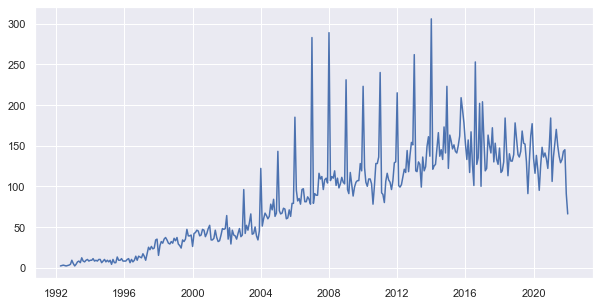

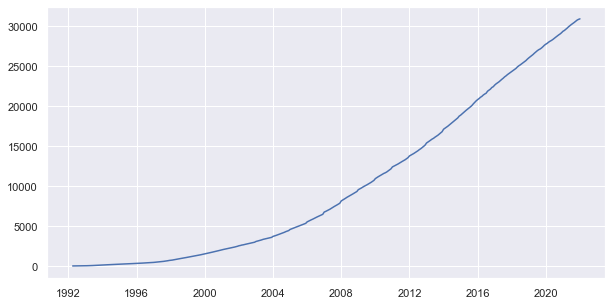

In [56]:
df_ts_count = df_orgs.select([pl.col('Doi'), pl.col('Date')]).groupby('Date').count().sort('Date').with_column(pl.col('count').cumsum().alias('CumSum'))

figsize = (10, 5)

fig = plt.figure(figsize=figsize)
plt.plot(
    df_ts_count.get_column('Date'),
    df_ts_count.get_column('count'),
)
plt.show()

fig = plt.figure(figsize=figsize)
plt.plot(
    df_ts_count.get_column('Date'),
    df_ts_count.get_column('CumSum'),
)
plt.show()

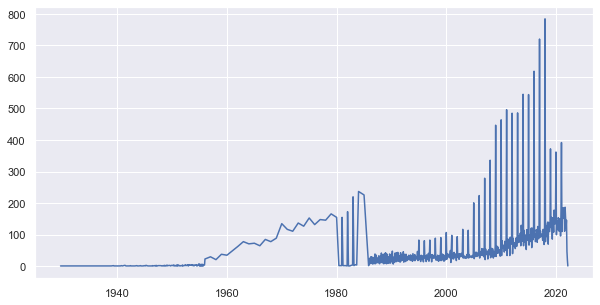

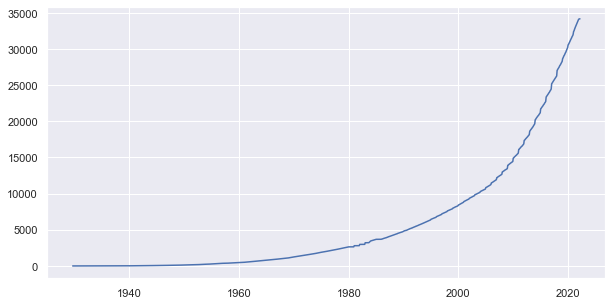

In [57]:
df_ts_count = df_gens.select([pl.col('Doi'), pl.col('Date')]).groupby('Date').count().sort('Date').with_column(pl.col('count').cumsum().alias('CumSum'))

fig = plt.figure(figsize=figsize)
plt.plot(
    df_ts_count.get_column('Date'),
    df_ts_count.get_column('count'),
)
plt.show()

fig = plt.figure(figsize=figsize)
plt.plot(
    df_ts_count.get_column('Date'),
    df_ts_count.get_column('CumSum'),
)
plt.show()

In [71]:

nx.core_number(G_orgs)

{'10.1086/517897': 25,
 '10.2307/2393938': 26,
 '10.1177/000312240406900203': 9,
 '10.1086/374404': 18,
 '10.2307/2657333': 9,
 '10.1086/230320': 9,
 '10.1086/230321': 9,
 '10.2307/2095608': 9,
 '10.2307/2096358': 4,
 '10.2307/256876': 24,
 '10.2307/256942': 24,
 '10.2307/256621': 21,
 '10.2307/259247': 26,
 '10.2307/2393010': 26,
 '10.2307/256928': 24,
 '10.2307/258044': 21,
 '10.1086/227352': 26,
 '10.1086/225469': 26,
 '10.2307/2091658': 10,
 '10.2307/2094028': 7,
 '10.1086/226790': 10,
 '10.1086/226141': 24,
 '10.1287/orsc.1080.0406': 26,
 '10.1509/jmkg.2005.69.4.61': 26,
 '10.2307/3094913': 26,
 '10.2307/2393553': 26,
 '10.1002/smj.319': 25,
 '10.1287/orsc.6.5.524': 21,
 '10.2307/258557': 26,
 '10.2307/256337': 26,
 '10.2307/20159573': 26,
 '10.2307/20159793': 26,
 '10.2307/2393655': 26,
 '10.1287/orsc.13.3.290.2772': 26,
 '10.1287/orsc.1060.0200': 26,
 '10.1287/orsc.11.3.263.12503': 18,
 '10.2307/259204': 26,
 '10.1177/0149206306290712': 26,
 '10.1287/orsc.2.1.71': 26,
 '10.2307/

(array([3.0829e+04, 4.8000e+01, 1.2000e+01, 5.0000e+00, 7.0000e+00,
        2.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([1.0000e+00, 1.1630e+02, 2.3160e+02, 3.4690e+02, 4.6220e+02,
        5.7750e+02, 6.9280e+02, 8.0810e+02, 9.2340e+02, 1.0387e+03,
        1.1540e+03]),
 <BarContainer object of 10 artists>)

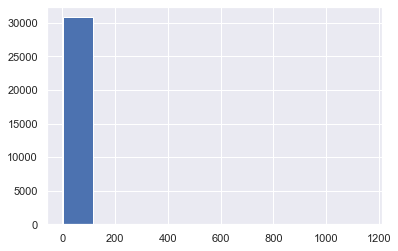

In [23]:
sns.set()

from collections import Counter

counts, bins = np.histogram(list(gens_degrees_map.values()))

plt.hist(bins[:-1], bins, weights=counts)


